# About Titanic Dataset

##### VARIABLE DESCRIPTIONS:
survival:        Survival
                (0 = No; 1 = Yes)
                
pclass:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name:            Name

sex:             Sex

age:             Age

sibsp:           Number of Siblings/Spouses Aboard

parch:           Number of Parents/Children Aboard

ticket:          Ticket Number

fare:            Passenger Fare

cabin:           Cabin

embarked:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


# Importing libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Preprocessing - EDA,cleaning data,handling missing values

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

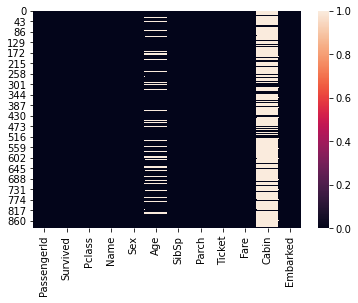

In [7]:
sns.heatmap(df_train.isnull())

<AxesSubplot:>

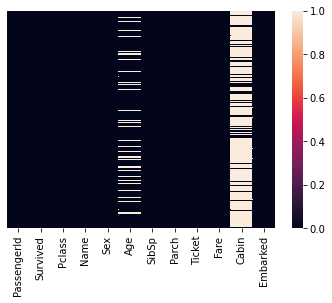

In [8]:
sns.heatmap(df_train.isnull(),yticklabels=False)

<AxesSubplot:>

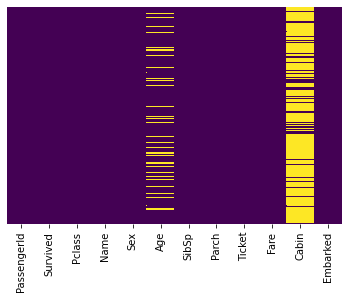

In [9]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

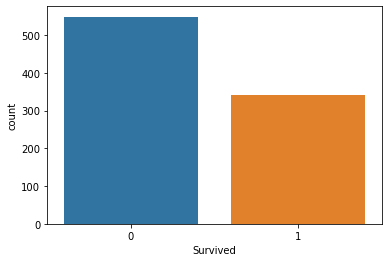

In [10]:
sns.countplot(x='Survived',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

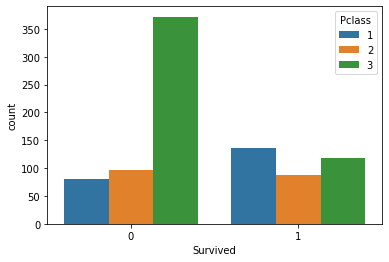

In [11]:
sns.countplot(x='Survived',data=df_train,hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

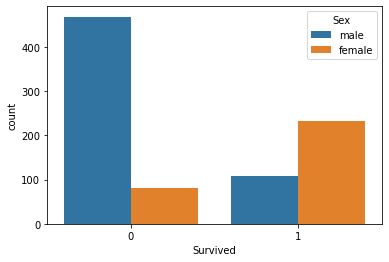

In [12]:
sns.countplot(x='Survived',data=df_train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

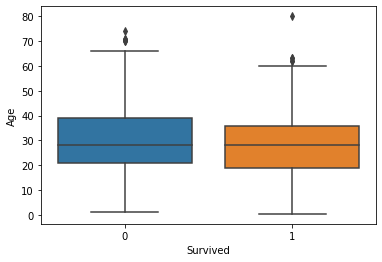

In [13]:
sns.boxplot(x='Survived',y='Age',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

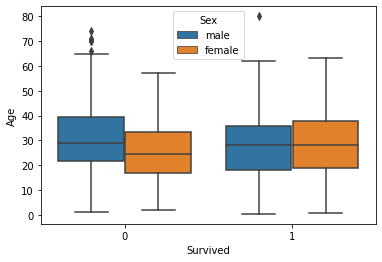

In [14]:
sns.boxplot(x='Survived',y='Age',data=df_train,hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

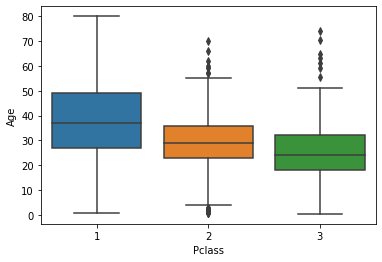

In [15]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

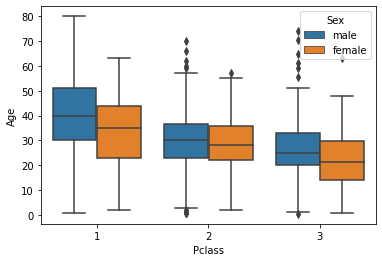

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df_train,hue='Sex')

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

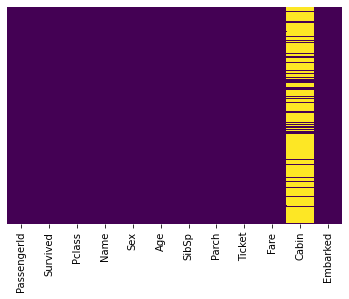

In [19]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df_train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

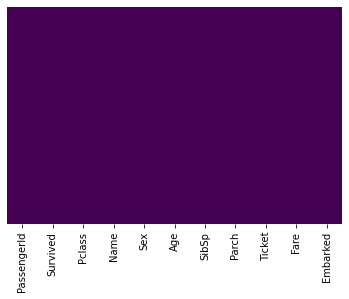

In [21]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
df_train.dropna(inplace=True)

In [24]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
df_train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [27]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df_train.Sex = df_train.Sex.map({"male":0,"female":1})

In [29]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


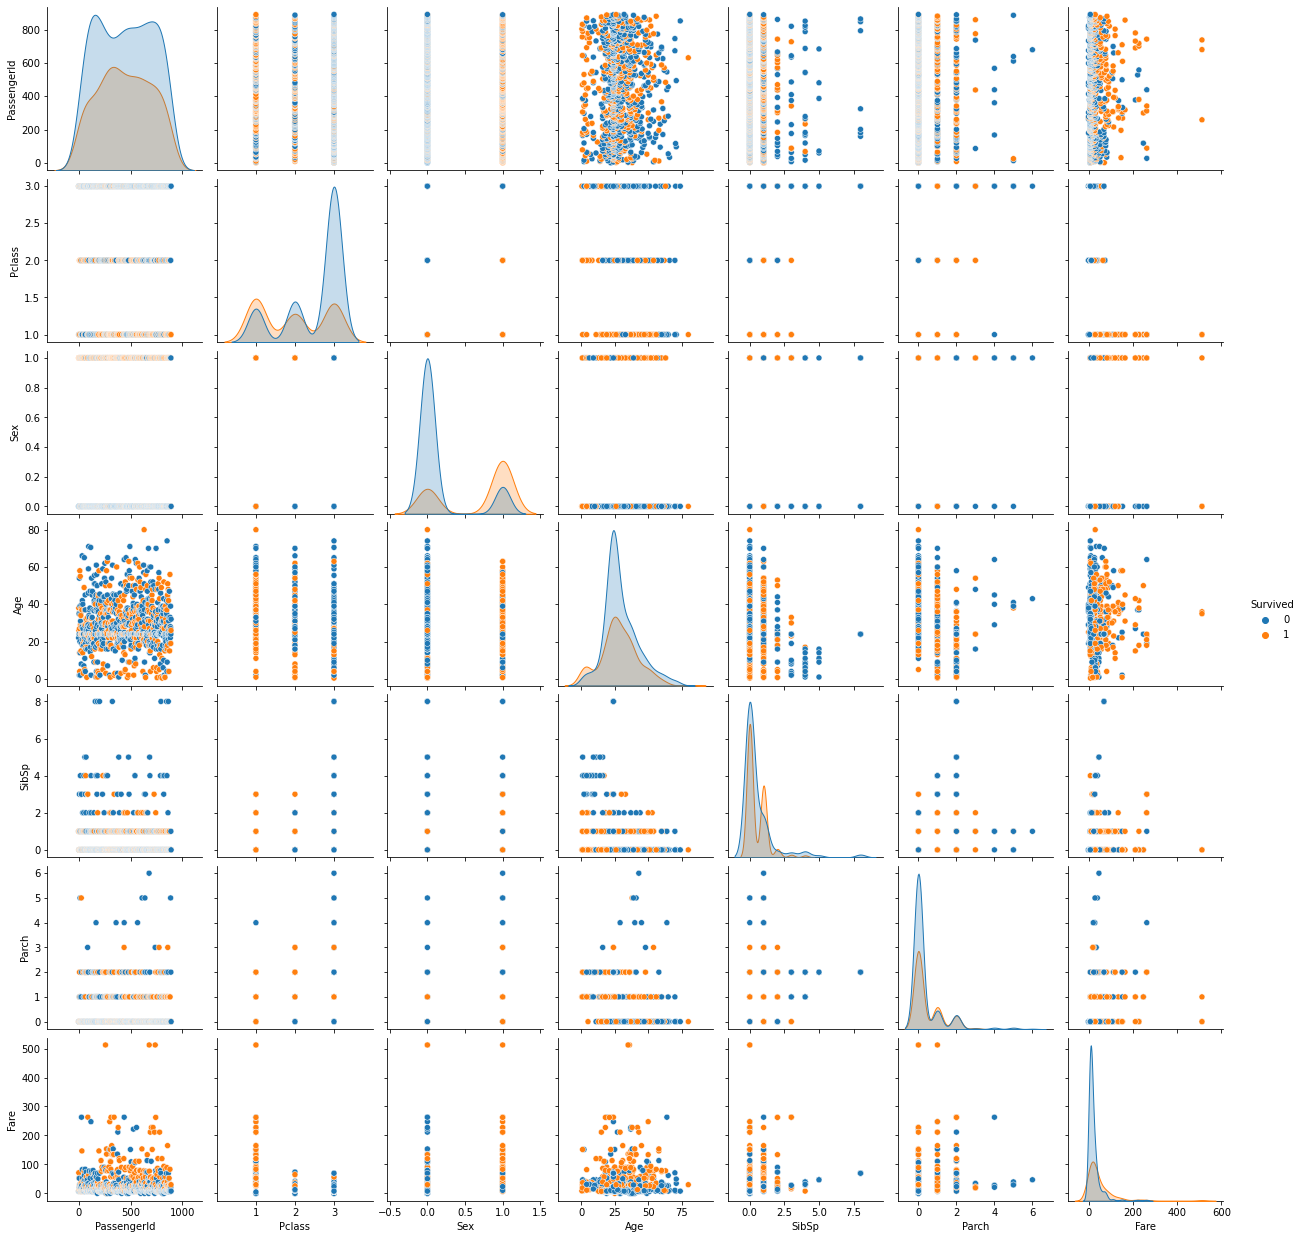

In [30]:
sns.pairplot(df_train,hue='Survived')

# Feature Selection

In [31]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [32]:
df_train

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
886,0,2,0,27.0
887,1,1,1,19.0
888,0,3,1,24.0
889,1,1,0,26.0


In [33]:
X_train = df_train.drop('Survived', axis=1)
Y_train = df_train['Survived']

In [34]:
X_train

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
886,2,0,27.0
887,1,1,19.0
888,3,1,24.0
889,1,0,26.0


# Modelling , Evaluation with k-Fold Cross-Validation

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [37]:
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
        print(f"Score of Model {clf[i]} :",round(np.mean(score)*100,2))

model_fit()

Score of Model KNeighborsClassifier(n_neighbors=13) : 76.49
Score of Model DecisionTreeClassifier() : 81.22
Score of Model RandomForestClassifier(n_estimators=13) : 80.89
Score of Model GaussianNB() : 78.41
Score of Model SVC() : 63.89
Score of Model ExtraTreeClassifier() : 80.77
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 79.75
Score of Model AdaBoostClassifier() : 80.1
Score of Model ExtraTreesClassifier() : 81.22


In [38]:
df_test=pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
df_test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [40]:
df_test.Sex = df_test.Sex.map({"male":0,"female":1})

In [41]:
df_test

,PassengerId,Pclass,Sex,Age
0,892,3,0,34.5
1,893,3,1,47.0
2,894,2,0,62.0
3,895,3,0,27.0
4,896,3,1,22.0
...,...,...,...,...
413,1305,3,0,NaN
414,1306,1,1,39.0
415,1307,3,0,38.5
416,1308,3,0,NaN


In [42]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

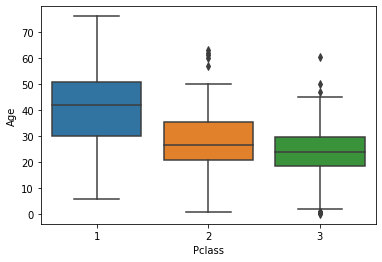

In [43]:
sns.boxplot(x='Pclass',y='Age',data=df_test)

In [44]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        if Pclass==2:
            return 28
        else:
            return 25
    else:
        return Age

In [45]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_Age,axis=1)

In [46]:
df_test

,PassengerId,Pclass,Sex,Age
0,892,3,0,34.5
1,893,3,1,47.0
2,894,2,0,62.0
3,895,3,0,27.0
4,896,3,1,22.0
...,...,...,...,...
413,1305,3,0,25.0
414,1306,1,1,39.0
415,1307,3,0,38.5
416,1308,3,0,25.0


In [47]:
df_passengerid_test=pd.DataFrame(df_test['PassengerId'])

In [48]:
df_passengerid_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [49]:
df_test.drop('PassengerId',axis=1,inplace=True)

In [50]:
df_test.head()

,Pclass,Sex,Age
0,3,0,34.5
1,3,1,47.0
2,2,0,62.0
3,3,0,27.0
4,3,1,22.0


In [51]:
clf1 = GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10)
clf1.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10)

In [52]:
prediction = clf1.predict(df_test)

In [53]:
df_test['Survived'] = prediction

In [54]:
df_Survived_test=pd.DataFrame(df_test['Survived'])

In [55]:
df_Survived_test['Survived']

0      0
1      0
2      1
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [56]:
sub=pd.concat([df_passengerid_test,df_Survived_test],axis=1)

In [57]:
sub.set_index("PassengerId",inplace=True)

In [58]:
sub

,Survived
PassengerId,
892,0
893,0
894,1
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [59]:
#submission = pd.DataFrame(df_Survived_test['Survived'],df_passengerid_test['PassengerId'])
sub.to_csv("Submission.csv")